Objective:
My objevtive for the machine learning project is to create a Recurrent Neural Network (RNN) that can generate (somewhat) legible poetry based on a collection of poems. To do so, I will clean the data and cut up groups of words into sets of inputs for the network to take. The size of the input i.e. the number of words is yet to be determined considering we want to have a large enough input size to gather important features like rhyme schemes and context for the LSTM cell to remember, but we don't want to be too large in our input size that training is too slow. 

Instead of feeding in actual words, I will encode each word into an identifier, making the unique set of these identifiers as the Y vector for our supervised learning to take place. The vocabulary vector, our Y vector, will be one hot encoded for the word that was actually present, which the LSTM cell will attempt at predicting for each time step. 

link to data : https://www.kaggle.com/ishnoor/poetry-analysis-with-machine-learning

In [1]:
import pandas as pd
import numpy as np

poems = pd.read_csv("all.csv")

In [2]:
poems['length'] = 0
for i in range(len(poems)):
    poems['length'][i] = len(poems['content'][i])

/Users/samburtch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Clean data by deleting null entries etc.

In [3]:
poems = poems.sort_values(by='length') #Sort by length of poem
poems = poems[14:len(poems)-5] # Delete tails on both sides
poems = poems[poems['content'].str.contains('Published')==False]# Eliminate non-poems with 'Published'
print(len(poems))
poems = poems[poems['content'].str.contains('from Selected Poems')==False]# Eliminate non-poems with 'from Selected Poems'
print(len(poems))
poems = poems[poems['content'].str.contains('Collected Poems')==False]# Eliminate non-poems with 'from Collected Poems'
print(len(poems))
#Eliminate where poem is just intro
for ind, row in poems.iterrows():
    if row['author'] in row['content'].upper() or str(row['poem name']) in row['content'][:40]:
        poems = poems.drop([ind])
print(len(poems))

552
536
518
465


Create vocab size and word dictionary

In [9]:
num_poems = len(poems)
poem = poems['content'][:num_poems]
poem = poem.reset_index(drop=True)
temp = ''
for i in range(num_poems):
    temp += poem[i] + '\r\n'
poem = temp
## We only want words, so eliminate \r\n
poem = poem.replace('\r\n\r\n', '\r\n')
poem = poem.replace('\r\n', ' ')
poem = poem.replace('\'', '')

import re
poem = re.sub(' +',' ',poem)
poem = poem.lower()
poem = re.findall(r"[\w]+|[.,!?;:]",poem)
words = list(set(poem))
vocab_size = len(words)
print(vocab_size)
print(words[:200])

10083
['ornaments', 'rusts', 'vphold', 'desecrating', 'tempes', 'keeper', 'height', 'fickle', 'horsemanship', 'mapled', 'pretense', 'tarquin', 'ermines', 'trustees', 'healing', 'helpful', 'unmatched', 'ask', 'herrings', 'fishers', 'trim', 'oer', 'struttin', 'heels', 'deity', 'sordid', 'gently', 'hangs', 'reveald', 'torture', 'anon', 'pheasant', 'wile', 'flares', 'village', 'colin', 'parchd', 'integrity', 'spare', 'returne', 'vaines', 'any', 'ruminate', 'feedst', 'unchiselled', 'rippling', 'shaken', 'vale', 'today', 'withering', 'derivd', 'rhythms', 'atomies', 'homely', 'silently', 'iridescent', 'lerne', 'twain', 'grown', 'muscles', 'bridges', 'hurt', 'look', 'curious', 'flout', 'plans', 'boss', 'eager', 'unforgotten', 'bight', 'uplifted', 'hits', 'maim', 'bayleaves', 'subornd', 'enjoying', 'swan', 'alteration', 'undone', 'magnified', 'courteous', 'such', 'went', 'shorn', 'praise', 'wil', 'drunk', 'majors', 'phyp', 'take', 'tedious', 'pursuivants', 'accent', 'stirs', 'filed', 'darte', '

349
           length
count  349.000000
mean   592.604585
std    166.559035
min    115.000000
25%    538.000000
50%    618.000000
75%    651.000000
max    993.000000


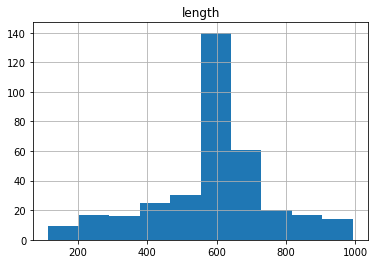

In [23]:
#poems['length'].hist(bins=40)
X = poems[poems['length'] > 100]
X = poems[poems['length'] < 1000]
X.hist()
print(X.describe())

RNN Model:

In [ ]:
from keras.models import Sequential

num_steps = 1000

model = Sequential()
model.add(Embedding(vocabulary, hidden_size, input_length=num_steps))
model.add(LSTM(hidden_size, return_sequences=True))
# model.add(LSTM(hidden_size, return_sequences=True))
if use_dropout:
    model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(vocabulary)))
model.add(Activation('softmax'))

Train Model